In [690]:
#Hello, Welcome to my project.
#Despite how this may appear to the untrained eye this project took me way longer than I would ever car to admit.
#When I was in school I did knitting, the first thing we'd to knit was a hairband, I finished my hairband when the others had moved on.
#They'd moved onto teddies and here I was with my hairband. 
#What I'm trying to say is that I have realised that python is knitting with text, except the knitting doesn't tell you errors.

In [691]:
#Don't get too excited, I'm not sure how many of these I actually ended up using and now I'm too afraid to delete them. 

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.cbook as cbook
from IPython.display import display

import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [692]:
#Originally I wanted to look at traffic flow vs lockdown situations for a road near me.
#I was excited to see there was a company call HERE who allowed access to traffic API data so I got an account. 
#I then figured out how to get the API data for the stretch of road near my house that I was interested in, which was HARD TO FIGURE OUT.
#Mostly because it involves co-ordinates. 

In [693]:
import urllib.request as request
import json

In [694]:
#Importing the api request and converting to a python dictionary with error codes if this doesn't work

with request.urlopen('https://traffic.ls.hereapi.com/traffic/6.1/flow.json?bbox=53.3889%2C-6.2682%3B53.3798%2C-6.2635&apiKey=M3ZSqPhRuJ0AwhpJdO9Eg1hTCzvoeHFIyGnNHbSUQtI') as response:
        if response.getcode() == 200:
            source = response.read()
            data = json.loads(source)
        else:
            print('An error occurred while attempting to retrieve data from the API.')

In [695]:
print(data)

{'RWS': [{'RW': [{'FIS': [{'FI': [{'TMC': {'PC': 4315, 'DE': 'Griffith Avenue (R102)', 'QD': '+', 'LE': 0.03343}, 'CF': [{'TY': 'TR', 'SP': 24.0, 'SU': 24.0, 'FF': 31.0, 'JF': 2.00716, 'CN': 0.7}]}, {'TMC': {'PC': 4314, 'DE': 'Glasnevin Hill', 'QD': '+', 'LE': 0.38321}, 'CF': [{'TY': 'TR', 'SP': 25.0, 'SU': 25.0, 'FF': 32.2, 'JF': 1.98757, 'CN': 0.7}]}]}], 'mid': 'TrafficPatterns', 'LI': '242-04313', 'DE': 'Ballymun Road', 'PBT': '2021-11-22T14:20:12Z'}, {'FIS': [{'FI': [{'TMC': {'PC': 4314, 'DE': 'Glasnevin Hill', 'QD': '-', 'LE': 0.03959}, 'CF': [{'TY': 'TR', 'SP': 20.37, 'SU': 20.37, 'FF': 30.0, 'JF': 1.9652, 'CN': 0.74}]}, {'TMC': {'PC': 4315, 'DE': 'Griffith Avenue (R102)', 'QD': '-', 'LE': 0.37705}, 'CF': [{'TY': 'TR', 'SP': 14.01, 'SU': 14.01, 'FF': 33.0, 'JF': 3.14159, 'CN': 0.86}]}]}], 'mid': 'TrafficPatterns', 'LI': '242+04313', 'DE': 'Ballymun Road', 'PBT': '2021-11-22T14:20:12Z'}, {'FIS': [{'FI': [{'TMC': {'PC': 5016, 'DE': 'Ballymun Road', 'QD': '+', 'LE': 0.02675}, 'CF': 

In [696]:
#What a hot mess of data. Anyways I wanted to import data like this for two weeks then sort it out but I emailed HERE asking if I could timestamp
#the API for different days in the past, I was doing to take the same time point for different days then compare the lockdown data. And they called
#me and I had a lovely 15 minute chat with a woman from Longford who recently started with their Rome office to get the answer that I would
#have to pay for something like that and it wouldn't be worth my time. 
#This is why I needed another plan when I'd already spent way too long on this plan and messing with data. I also must say I lost my original
#data sheet that had me playing with their API so this is just a reconstruction to show that I tried to use an API. 


In [697]:
#It turns out that traffic cam data is also data and originally I found they had information for the swords road which was 'northside' 
#on closer inspection I found that it was inside the port tunnel and no one wants inside the port tunnel. I changed to looking at southside.
#I choose a location specifically outside Bray as it is a route out of the city and it is also a route to scenenic Wicklow. 

In [698]:
#The traffic data from Description: M11 Between Jn5 Bray North and Jn6 Bray Central, Fassaroe , Co. Wicklow
#Coordinates: 53.20248, -6.1296

df = pd.read_csv (r'C:\Users\maria.boyle\Desktop\traffic.csv')

In [699]:
print (df)

np.array(df)



                          Date        Day Direction  MBIKE    CAR   LGV  BUS  \
0     Wednesday 1 January 2020  Wednesday         S     75  20027  1067   57   
1     Wednesday 1 January 2020  Wednesday         N     73  20893  1113   59   
2      Thursday 2 January 2020   Thursday         S     84  26116  2457  122   
3      Thursday 2 January 2020   Thursday         N     99  26681  2788  125   
4        Friday 3 January 2020     Friday         S    123  29580  2809  161   
...                        ...        ...       ...    ...    ...   ...  ...   
1213     Sunday 29 August 2021     Sunday         N    212  33050  2270   94   
1214     Monday 30 August 2021     Monday         S    145  27589  4465  196   
1215     Monday 30 August 2021     Monday         N    128  29707  4765  190   
1216    Tuesday 31 August 2021    Tuesday         S    119  28055  4528  197   
1217    Tuesday 31 August 2021    Tuesday         N    122  29157  4791  175   

      HGV_RIG  HGV_ART  CARAVAN  TOTAL_

array([['Wednesday 1 January 2020', 'Wednesday', 'S', ..., 11, 67, 21304],
       ['Wednesday 1 January 2020', 'Wednesday', 'N', ..., 16, 75, 22229],
       ['Thursday 2 January 2020', 'Thursday', 'S', ..., 38, 714, 29531],
       ...,
       ['Monday 30 August 2021', 'Monday', 'N', ..., 213, 1551, 36554],
       ['Tuesday 31 August 2021', 'Tuesday', 'S', ..., 175, 1569, 34643],
       ['Tuesday 31 August 2021', 'Tuesday', 'N', ..., 180, 1528, 35953]],
      dtype=object)

In [700]:
#Checking for null values
df.isnull().values.any()

False

In [701]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1218 non-null   object
 1   Day        1218 non-null   object
 2   Direction  1218 non-null   object
 3   MBIKE      1218 non-null   int64 
 4   CAR        1218 non-null   int64 
 5   LGV        1218 non-null   int64 
 6   BUS        1218 non-null   int64 
 7   HGV_RIG    1218 non-null   int64 
 8   HGV_ART    1218 non-null   int64 
 9   CARAVAN    1218 non-null   int64 
 10  TOTAL_HGV  1218 non-null   int64 
 11  TOTAL_ALL  1218 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 114.3+ KB


In [702]:
df.nunique()

Date          609
Day             7
Direction       2
MBIKE         205
CAR          1192
LGV          1039
BUS           194
HGV_RIG       588
HGV_ART       571
CARAVAN       247
TOTAL_HGV     713
TOTAL_ALL    1188
dtype: int64

In [703]:
#Conversting date to Datetime
df['Date'] =  pd.to_datetime(df['Date'])


In [704]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1218 non-null   datetime64[ns]
 1   Day        1218 non-null   object        
 2   Direction  1218 non-null   object        
 3   MBIKE      1218 non-null   int64         
 4   CAR        1218 non-null   int64         
 5   LGV        1218 non-null   int64         
 6   BUS        1218 non-null   int64         
 7   HGV_RIG    1218 non-null   int64         
 8   HGV_ART    1218 non-null   int64         
 9   CARAVAN    1218 non-null   int64         
 10  TOTAL_HGV  1218 non-null   int64         
 11  TOTAL_ALL  1218 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 114.3+ KB


In [705]:
grouped = df.groupby('Date')

In [706]:

work = df[['Date', 'Direction', 'Day', 'CAR', 'TOTAL_HGV']]

print(work)
        

           Date Direction        Day    CAR  TOTAL_HGV
0    2020-01-01         S  Wednesday  20027         67
1    2020-01-01         N  Wednesday  20893         75
2    2020-01-02         S   Thursday  26116        714
3    2020-01-02         N   Thursday  26681        726
4    2020-01-03         S     Friday  29580        911
...         ...       ...        ...    ...        ...
1213 2021-08-29         N     Sunday  33050        269
1214 2021-08-30         S     Monday  27589       1484
1215 2021-08-30         N     Monday  29707       1551
1216 2021-08-31         S    Tuesday  28055       1569
1217 2021-08-31         N    Tuesday  29157       1528

[1218 rows x 5 columns]


In [707]:
# get the row of minimum value

df.loc[df['CAR'].idxmin()]

Date         2020-04-12 00:00:00
Day                       Sunday
Direction                      S
MBIKE                         20
CAR                         2621
LGV                          217
BUS                           33
HGV_RIG                       24
HGV_ART                       42
CARAVAN                        8
TOTAL_HGV                     66
TOTAL_ALL                   2965
Name: 204, dtype: object

In [708]:
# get the row of minimum value

df.loc[df['CAR'].idxmax()]

Date         2021-07-18 00:00:00
Day                       Sunday
Direction                      N
MBIKE                        255
CAR                        35090
LGV                         2162
BUS                           84
HGV_RIG                       94
HGV_ART                      131
CARAVAN                      163
TOTAL_HGV                    225
TOTAL_ALL                  37979
Name: 1129, dtype: object

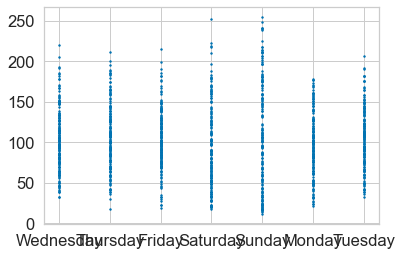

In [709]:
plt.scatter(df['Day'], df['MBIKE'], s=2)

plt.show()

In [710]:
# Weather data obtained from https://www.met.ie/climate/available-data/historical-data#The information that came with the file
#Station Name: DUBLIN AIRPORT				
#Station Height: 71 M 				
#Latitude:53.428  	Longitude: -6.241			
				
				
#date:   -  00 to 00 utc				
#rain:   -  Precipitation Amount (mm)				
#"maxtp:  -  Maximum Air Temperature (C)	  "				
#mintp:  -  Minimum  Air Temperature (C)				
#gmin:   -  09utc Grass Minimum Temperature (C)				
#soil:   -  Mean 10cm Soil Temperature (C)				
#wdsp:   -  Mean Wind Speed (knot)				
#"hm:     -  Highest ten minute mean wind speed (knot)		                 "				
#ddhm:   -  Wind Direction at max 10 min. mean (deg)                  				
#hg:     -  Highest Gust (knot)				
#cbl:    -  Mean CBL Pressure (hpa)				
#sun:    -  Sunshine duration (hours)				
#g_rad:  -  Global Radiation (j/cm sq.)				
#"pe:     -  Potential Evapotranspiration (mm)				"				
#"evap:   -  Evaporation (mm)						"				
#"smd_wd: -  Soil Moisture Deficits(mm) well drained		"				
#"smd_md: -  Soil Moisture Deficits(mm) moderately drained	"				
#"smd_pd: -  Soil Moisture Deficits(mm) poorly drained 	"				
#ind:    -  Indicator (i)				



In [711]:
wdf = pd.read_excel(r'C:\Users\maria.boyle\Desktop\Airport weather.xlsx')

In [712]:
print(wdf)

            date  ind  maxtp  ind.1  mintp  igmin  gmin  ind.2  rain     cbl  \
0     1942-01-01    0    9.7      0    6.8      0   4.7      2   0.0  1020.3   
1     1942-01-02    0    9.9      0    7.9      0   6.7      0   0.1  1016.2   
2     1942-01-03    0   11.2      0    8.9      0   7.2      0   1.5  1006.8   
3     1942-01-04    0    9.2      0    2.7      0   3.4      0   3.5  1001.5   
4     1942-01-05    0    3.5      1   -0.8      0     0      0   0.6  1013.4   
...          ...  ...    ...    ...    ...    ...   ...    ...   ...     ...   
29154 2021-10-27    0   16.8      0   14.4      0  13.4      0   9.8   993.7   
29155 2021-10-28    0   15.2      0   10.1      0  11.9      0  10.7   987.1   
29156 2021-10-29    0   12.9      0    8.5      0   8.3      0   7.4   980.8   
29157 2021-10-30    0   11.6      0    5.7      0     4      0   0.1   980.8   
29158 2021-10-31    0   11.9      0    7.3      0   1.8      0  12.2   972.2   

       ...  hg  sun dos  g_rad    soil 

In [713]:
wdf = wdf.rename(columns={'date': 'Date'})

wdf['Date'] =  pd.to_datetime(wdf['Date'])

wdf = wdf[['Date', 'maxtp', 'rain', 'sun']]
#I'm going to start the analysis a bit later due to new years
start_date = '01-01-2020'
end_date = '29-08-2021'

selection = (wdf['Date'] > start_date) & (wdf['Date'] <= end_date)

wdf = wdf[selection]








In [714]:
print(wdf)

            Date  maxtp  rain   sun
28490 2020-01-02   11.4   1.2   0.0
28491 2020-01-03    7.6   0.0   6.0
28492 2020-01-04    8.0   0.1   0.1
28493 2020-01-05   11.0   0.0   0.8
28494 2020-01-06   10.3   2.4   2.4
...          ...    ...   ...   ...
29091 2021-08-25   21.7   0.0  10.2
29092 2021-08-26   20.8   0.0  12.4
29093 2021-08-27   18.6   0.0   9.5
29094 2021-08-28   20.2   0.0  12.2
29095 2021-08-29   17.6   0.0   0.5

[606 rows x 4 columns]


In [715]:
wdf.isnull().values.any()

False

In [716]:
#I got a dataset of stay at home requirements from https://github.com/OxCGRT/covid-policy-tracker/tree/master/data

#Stay at home requirements	Record orders to "shelter-in-place" and otherwise confine to the home	Ordinal scale	0 - no measures
#1 - recommend not leaving house
#2 - require not leaving house with exceptions for daily exercise, grocery shopping, and 'essential' trips
#3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc)
#Blank - no data


rdf = pd.read_csv (r'C:\Users\maria.boyle\Desktop\c6_stay_at_home_requirements.csv') 

In [717]:
print(rdf)



     Unnamed: 0 country_code  country_name  01Jan2020  02Jan2020  03Jan2020  \
0             1          ABW         Aruba        0.0        0.0        0.0   
1             2          AFG   Afghanistan        0.0        0.0        0.0   
2             3          AGO        Angola        0.0        0.0        0.0   
3             4          ALB       Albania        0.0        0.0        0.0   
4             5          AND       Andorra        0.0        0.0        0.0   
..          ...          ...           ...        ...        ...        ...   
181         182          VUT       Vanuatu        0.0        0.0        0.0   
182         183          YEM         Yemen        0.0        0.0        0.0   
183         184          ZAF  South Africa        0.0        0.0        0.0   
184         185          ZMB        Zambia        0.0        0.0        0.0   
185         186          ZWE      Zimbabwe        0.0        0.0        0.0   

     04Jan2020  05Jan2020  06Jan2020  07Jan2020  ..

In [718]:
travel = rdf[rdf['country_name'].str.match('Ireland')]
print(travel)

    Unnamed: 0 country_code country_name  01Jan2020  02Jan2020  03Jan2020  \
78          79          IRL      Ireland        0.0        0.0        0.0   

    04Jan2020  05Jan2020  06Jan2020  07Jan2020  ...  05Nov2021  06Nov2021  \
78        0.0        0.0        0.0        0.0  ...        1.0        1.0   

    07Nov2021  08Nov2021  09Nov2021  10Nov2021  11Nov2021  12Nov2021  \
78        NaN        NaN        NaN        NaN        NaN        NaN   

    13Nov2021  14Nov2021  
78        NaN        NaN  

[1 rows x 687 columns]


In [719]:
#Getting rid of the nulls
travel = travel.replace(np.nan,0)

In [720]:
#Transposing the rows and columns, I thought this was pretty cool.
travel_transpose = travel.T

In [721]:
print(travel_transpose)

                   78
Unnamed: 0         79
country_code      IRL
country_name  Ireland
01Jan2020         0.0
02Jan2020         0.0
...               ...
10Nov2021         0.0
11Nov2021         0.0
12Nov2021         0.0
13Nov2021         0.0
14Nov2021         0.0

[687 rows x 1 columns]


In [722]:
restrictions = travel_transpose.iloc[3:, :]

restrictions = restrictions.reset_index()

restrictions.columns =['Date', 'Code']

In [723]:
print(restrictions)

          Date Code
0    01Jan2020  0.0
1    02Jan2020  0.0
2    03Jan2020  0.0
3    04Jan2020  0.0
4    05Jan2020  0.0
..         ...  ...
679  10Nov2021  0.0
680  11Nov2021  0.0
681  12Nov2021  0.0
682  13Nov2021  0.0
683  14Nov2021  0.0

[684 rows x 2 columns]


In [724]:
restrictions['Date'] =  pd.to_datetime(restrictions['Date'])


In [725]:
print(restrictions)

          Date Code
0   2020-01-01  0.0
1   2020-01-02  0.0
2   2020-01-03  0.0
3   2020-01-04  0.0
4   2020-01-05  0.0
..         ...  ...
679 2021-11-10  0.0
680 2021-11-11  0.0
681 2021-11-12  0.0
682 2021-11-13  0.0
683 2021-11-14  0.0

[684 rows x 2 columns]


In [726]:
#MERGING DATAFRAMES

restriction_traffic = pd.merge(df, restrictions, how='outer', on ='Date')
                            

between = (restriction_traffic['Date'] > start_date) & (restriction_traffic['Date'] <= end_date)

rtraffic = restriction_traffic.loc[between]

In [727]:
#desc = rtraffic.describe()
#print(desc)

In [728]:
rtraffic.set_index('Date')

,Day,Direction,MBIKE,CAR,LGV,BUS,HGV_RIG,HGV_ART,CARAVAN,TOTAL_HGV,TOTAL_ALL,Code
Date,,,,,,,,,,,,
2020-01-02,Thursday,S,84.0,26116.0,2457.0,122.0,359.0,355.0,38.0,714.0,29531.0,0.0
2020-01-02,Thursday,N,99.0,26681.0,2788.0,125.0,353.0,373.0,54.0,726.0,30473.0,0.0
2020-01-03,Friday,S,123.0,29580.0,2809.0,161.0,450.0,461.0,87.0,911.0,33671.0,0.0
2020-01-03,Friday,N,112.0,28916.0,2919.0,150.0,461.0,443.0,75.0,904.0,33076.0,0.0
2020-01-04,Saturday,S,85.0,26797.0,1906.0,92.0,143.0,170.0,42.0,313.0,29235.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,Friday,N,175.0,32198.0,4866.0,155.0,753.0,838.0,225.0,1591.0,39210.0,1.0
2021-08-28,Saturday,S,166.0,31921.0,2440.0,130.0,226.0,288.0,160.0,514.0,35331.0,1.0
2021-08-28,Saturday,N,170.0,32039.0,2677.0,129.0,213.0,320.0,171.0,533.0,35719.0,1.0


In [729]:
print(rtraffic)

           Date       Day Direction  MBIKE      CAR     LGV    BUS  HGV_RIG  \
2    2020-01-02  Thursday         S   84.0  26116.0  2457.0  122.0    359.0   
3    2020-01-02  Thursday         N   99.0  26681.0  2788.0  125.0    353.0   
4    2020-01-03    Friday         S  123.0  29580.0  2809.0  161.0    450.0   
5    2020-01-03    Friday         N  112.0  28916.0  2919.0  150.0    461.0   
6    2020-01-04  Saturday         S   85.0  26797.0  1906.0   92.0    143.0   
...         ...       ...       ...    ...      ...     ...    ...      ...   
1209 2021-08-27    Friday         N  175.0  32198.0  4866.0  155.0    753.0   
1210 2021-08-28  Saturday         S  166.0  31921.0  2440.0  130.0    226.0   
1211 2021-08-28  Saturday         N  170.0  32039.0  2677.0  129.0    213.0   
1212 2021-08-29    Sunday         S  151.0  27586.0  1941.0  120.0    121.0   
1213 2021-08-29    Sunday         N  212.0  33050.0  2270.0   94.0    119.0   

      HGV_ART  CARAVAN  TOTAL_HGV  TOTAL_ALL Code  

In [730]:
rtraffic.dtypes




Date         datetime64[ns]
Day                  object
Direction            object
MBIKE               float64
CAR                 float64
LGV                 float64
BUS                 float64
HGV_RIG             float64
HGV_ART             float64
CARAVAN             float64
TOTAL_HGV           float64
TOTAL_ALL           float64
Code                 object
dtype: object

In [731]:
#Code being an object made this more difficult so I'd to change it
rtraffic['Code'].astype(float)

2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
       ... 
1209    1.0
1210    1.0
1211    1.0
1212    1.0
1213    1.0
Name: Code, Length: 1212, dtype: float64

In [732]:
rtraffic.dtypes


Date         datetime64[ns]
Day                  object
Direction            object
MBIKE               float64
CAR                 float64
LGV                 float64
BUS                 float64
HGV_RIG             float64
HGV_ART             float64
CARAVAN             float64
TOTAL_HGV           float64
TOTAL_ALL           float64
Code                 object
dtype: object

In [733]:
wtl = pd.merge(rtraffic, wdf, how='outer', on ='Date')

print(wtl)


           Date       Day Direction  MBIKE      CAR     LGV    BUS  HGV_RIG  \
0    2020-01-02  Thursday         S   84.0  26116.0  2457.0  122.0    359.0   
1    2020-01-02  Thursday         N   99.0  26681.0  2788.0  125.0    353.0   
2    2020-01-03    Friday         S  123.0  29580.0  2809.0  161.0    450.0   
3    2020-01-03    Friday         N  112.0  28916.0  2919.0  150.0    461.0   
4    2020-01-04  Saturday         S   85.0  26797.0  1906.0   92.0    143.0   
...         ...       ...       ...    ...      ...     ...    ...      ...   
1207 2021-08-27    Friday         N  175.0  32198.0  4866.0  155.0    753.0   
1208 2021-08-28  Saturday         S  166.0  31921.0  2440.0  130.0    226.0   
1209 2021-08-28  Saturday         N  170.0  32039.0  2677.0  129.0    213.0   
1210 2021-08-29    Sunday         S  151.0  27586.0  1941.0  120.0    121.0   
1211 2021-08-29    Sunday         N  212.0  33050.0  2270.0   94.0    119.0   

      HGV_ART  CARAVAN  TOTAL_HGV  TOTAL_ALL Code  

In [734]:
wtl['Code'] = wtl['Code'].astype(float)

In [735]:
wtl['Day'] = wtl['Day'].astype(str)

In [736]:
wtl.dtypes

Date         datetime64[ns]
Day                  object
Direction            object
MBIKE               float64
CAR                 float64
LGV                 float64
BUS                 float64
HGV_RIG             float64
HGV_ART             float64
CARAVAN             float64
TOTAL_HGV           float64
TOTAL_ALL           float64
Code                float64
maxtp               float64
rain                float64
sun                 float64
dtype: object

In [737]:
print(wtl)

           Date       Day Direction  MBIKE      CAR     LGV    BUS  HGV_RIG  \
0    2020-01-02  Thursday         S   84.0  26116.0  2457.0  122.0    359.0   
1    2020-01-02  Thursday         N   99.0  26681.0  2788.0  125.0    353.0   
2    2020-01-03    Friday         S  123.0  29580.0  2809.0  161.0    450.0   
3    2020-01-03    Friday         N  112.0  28916.0  2919.0  150.0    461.0   
4    2020-01-04  Saturday         S   85.0  26797.0  1906.0   92.0    143.0   
...         ...       ...       ...    ...      ...     ...    ...      ...   
1207 2021-08-27    Friday         N  175.0  32198.0  4866.0  155.0    753.0   
1208 2021-08-28  Saturday         S  166.0  31921.0  2440.0  130.0    226.0   
1209 2021-08-28  Saturday         N  170.0  32039.0  2677.0  129.0    213.0   
1210 2021-08-29    Sunday         S  151.0  27586.0  1941.0  120.0    121.0   
1211 2021-08-29    Sunday         N  212.0  33050.0  2270.0   94.0    119.0   

      HGV_ART  CARAVAN  TOTAL_HGV  TOTAL_ALL  Code 

In [738]:
#Decided to drop the subtypes of HGV because it turns out I don't want to learn about the different types of 
#HGV trucks

wtl = wtl.drop(columns=['HGV_RIG', 'HGV_ART'])







In [739]:
print(wtl)

           Date       Day Direction  MBIKE      CAR     LGV    BUS  CARAVAN  \
0    2020-01-02  Thursday         S   84.0  26116.0  2457.0  122.0     38.0   
1    2020-01-02  Thursday         N   99.0  26681.0  2788.0  125.0     54.0   
2    2020-01-03    Friday         S  123.0  29580.0  2809.0  161.0     87.0   
3    2020-01-03    Friday         N  112.0  28916.0  2919.0  150.0     75.0   
4    2020-01-04  Saturday         S   85.0  26797.0  1906.0   92.0     42.0   
...         ...       ...       ...    ...      ...     ...    ...      ...   
1207 2021-08-27    Friday         N  175.0  32198.0  4866.0  155.0    225.0   
1208 2021-08-28  Saturday         S  166.0  31921.0  2440.0  130.0    160.0   
1209 2021-08-28  Saturday         N  170.0  32039.0  2677.0  129.0    171.0   
1210 2021-08-29    Sunday         S  151.0  27586.0  1941.0  120.0    133.0   
1211 2021-08-29    Sunday         N  212.0  33050.0  2270.0   94.0    157.0   

      TOTAL_HGV  TOTAL_ALL  Code  maxtp  rain   sun

In [740]:
wtl = wtl.rename(columns={'TOTAL_HGV': 'HGV'})

wtl = wtl.rename(columns={'maxtp': 'temp'})


In [741]:


#selecting for dates in lockdown, I have no idea why this simple bit of code took me so long to sort out. BUT HERE WE ARE. 
lockdown = wtl.loc[wtl['Code'] >= 1]



weekend = wtl[wtl['Day'].str.contains('Saturday') | (wtl['Day'].str.contains('Sunday'))]

#Using the invert opertor like a pro to make weekdays, I'm aware there are other ways of doing this but look, this one is here. 
weekday = wtl[~wtl['Day'].str.contains('Saturday') | (wtl['Day'].str.contains('Sunday'))]


print(weekday)




           Date       Day Direction  MBIKE      CAR     LGV    BUS  CARAVAN  \
0    2020-01-02  Thursday         S   84.0  26116.0  2457.0  122.0     38.0   
1    2020-01-02  Thursday         N   99.0  26681.0  2788.0  125.0     54.0   
2    2020-01-03    Friday         S  123.0  29580.0  2809.0  161.0     87.0   
3    2020-01-03    Friday         N  112.0  28916.0  2919.0  150.0     75.0   
6    2020-01-05    Sunday         S  113.0  23723.0  1454.0   86.0     37.0   
...         ...       ...       ...    ...      ...     ...    ...      ...   
1205 2021-08-26  Thursday         N  179.0  33279.0  4976.0  182.0    206.0   
1206 2021-08-27    Friday         S  130.0  34417.0  4434.0  173.0    234.0   
1207 2021-08-27    Friday         N  175.0  32198.0  4866.0  155.0    225.0   
1210 2021-08-29    Sunday         S  151.0  27586.0  1941.0  120.0    133.0   
1211 2021-08-29    Sunday         N  212.0  33050.0  2270.0   94.0    157.0   

         HGV  TOTAL_ALL  Code  temp  rain   sun  
0

In [742]:
rain = wtl[['Date', 'rain']]
print(rain)

           Date  rain
0    2020-01-02   1.2
1    2020-01-02   1.2
2    2020-01-03   0.0
3    2020-01-03   0.0
4    2020-01-04   0.1
...         ...   ...
1207 2021-08-27   0.0
1208 2021-08-28   0.0
1209 2021-08-28   0.0
1210 2021-08-29   0.0
1211 2021-08-29   0.0

[1212 rows x 2 columns]


In [743]:
wtl['Weekday'] = wtl.apply(lambda x: 'Weekend' if (x['Day']=='Sunday' or x['Day']=='Saturday') else 'Weekday', axis=1)


In [744]:
wtl['Rainy'] = wtl.apply(lambda x: 'Yes' if x['rain'] > 1 else 'No', axis=1)

In [745]:
wtl['Cloud'] = wtl.apply(lambda x: 'Yes' if x['sun'] < 1 else 'No', axis=1)

In [746]:
wtl['Weather'] = wtl.apply(lambda x: 'Good' if x['rain'] < 1 and x['sun'] > 1 else 'Bad', axis=1)

In [747]:
print(wtl)

           Date       Day Direction  MBIKE      CAR     LGV    BUS  CARAVAN  \
0    2020-01-02  Thursday         S   84.0  26116.0  2457.0  122.0     38.0   
1    2020-01-02  Thursday         N   99.0  26681.0  2788.0  125.0     54.0   
2    2020-01-03    Friday         S  123.0  29580.0  2809.0  161.0     87.0   
3    2020-01-03    Friday         N  112.0  28916.0  2919.0  150.0     75.0   
4    2020-01-04  Saturday         S   85.0  26797.0  1906.0   92.0     42.0   
...         ...       ...       ...    ...      ...     ...    ...      ...   
1207 2021-08-27    Friday         N  175.0  32198.0  4866.0  155.0    225.0   
1208 2021-08-28  Saturday         S  166.0  31921.0  2440.0  130.0    160.0   
1209 2021-08-28  Saturday         N  170.0  32039.0  2677.0  129.0    171.0   
1210 2021-08-29    Sunday         S  151.0  27586.0  1941.0  120.0    133.0   
1211 2021-08-29    Sunday         N  212.0  33050.0  2270.0   94.0    157.0   

         HGV  TOTAL_ALL  Code  temp  rain   sun  We

In [748]:
CMH = wtl[['Date','Weekday','CAR', 'MBIKE','HGV', 'Weather', 'Code']]

print(CMH)

           Date  Weekday      CAR  MBIKE     HGV Weather  Code
0    2020-01-02  Weekday  26116.0   84.0   714.0     Bad   0.0
1    2020-01-02  Weekday  26681.0   99.0   726.0     Bad   0.0
2    2020-01-03  Weekday  29580.0  123.0   911.0    Good   0.0
3    2020-01-03  Weekday  28916.0  112.0   904.0    Good   0.0
4    2020-01-04  Weekend  26797.0   85.0   313.0     Bad   0.0
...         ...      ...      ...    ...     ...     ...   ...
1207 2021-08-27  Weekday  32198.0  175.0  1591.0    Good   1.0
1208 2021-08-28  Weekend  31921.0  166.0   514.0    Good   1.0
1209 2021-08-28  Weekend  32039.0  170.0   533.0    Good   1.0
1210 2021-08-29  Weekend  27586.0  151.0   234.0     Bad   1.0
1211 2021-08-29  Weekend  33050.0  212.0   269.0     Bad   1.0

[1212 rows x 7 columns]


In [749]:
CMH.groupby(['Weekday','Weather','Code']).mean()


CAR       MBIKE          HGV
Weekday Weather Code                                       
Weekday Bad     0.0   28571.692308  106.048077  1459.894231
                1.0   24723.961538  100.051282  1476.512821
                2.0   17813.850575   70.408046  1277.735632
        Good    0.0   28374.333333  122.038462  1452.038462
                1.0   27152.247253  145.203297  1531.038462
                2.0   15195.176471   83.276471  1124.405882
Weekend Bad     0.0   25977.592593   97.648148   319.592593
                1.0   24485.391304  106.347826   336.500000
                2.0    9766.532258   39.677419   269.758065
        Good    0.0   27124.388889  146.722222   271.833333
                1.0   24663.197674  156.360465   322.244186
                2.0   11511.926829   71.000000   298.670732

In [750]:
#Just looking at Jan data 

start_d = '01-01-2020'
end_date = '01-30-2020'

selection = (wtl['Date'] > start_date) & (wtl['Date'] <= end_date)

jan = wtl[selection]



jan.describe()


,MBIKE,CAR,LGV,BUS,CARAVAN,HGV,TOTAL_ALL,Code,temp,rain,sun
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,58.000000
mean,100.534483,29014.155172,3249.724138,157.689655,98.586207,1067.258621,33687.948276,0.0,8.951724,1.189655,2.144828
std,18.450708,1898.876896,929.560881,39.001218,34.988737,520.631248,3214.457453,0.0,2.322071,2.231567,2.119018
min,51.000000,23723.000000,1454.000000,76.000000,36.000000,141.000000,25554.000000,0.0,5.600000,0.000000,0.000000
25%,88.250000,27492.750000,2429.000000,122.750000,71.000000,449.250000,31011.000000,0.0,7.300000,0.000000,0.700000
50%,103.500000,29449.000000,3749.500000,178.000000,101.500000,1378.500000,34856.000000,0.0,8.600000,0.100000,1.300000
75%,113.000000,30618.500000,3971.250000,188.000000,128.000000,1449.500000,36254.500000,0.0,10.300000,1.400000,3.600000
max,134.000000,31946.000000,4262.000000,206.000000,158.000000,1563.000000,37959.000000,0.0,14.200000,9.300000,7.300000


In [751]:
#Just looking at Jan to end of March 

start_d = '01-01-2020'
end_date = '04-01-2020'

selection = (wtl['Date'] > start_date) & (wtl['Date'] <= end_date)

yrst = wtl[selection]

bikes = yrst[['Date','MBIKE','Weekday','Code']]

print(bikes)



          Date  MBIKE  Weekday  Code
0   2020-01-02   84.0  Weekday   0.0
1   2020-01-02   99.0  Weekday   0.0
2   2020-01-03  123.0  Weekday   0.0
3   2020-01-03  112.0  Weekday   0.0
4   2020-01-04   85.0  Weekend   0.0
..         ...    ...      ...   ...
177 2020-03-30   46.0  Weekday   2.0
178 2020-03-31   56.0  Weekday   2.0
179 2020-03-31   59.0  Weekday   2.0
180 2020-04-01   40.0  Weekday   2.0
181 2020-04-01   39.0  Weekday   2.0

[182 rows x 4 columns]


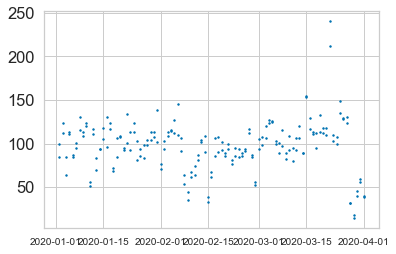

In [752]:
#This isn't very exciting but I just wanted to see what the data looked like

plt.scatter(bikes['Date'], bikes['MBIKE'], s=2)



plt.xticks(fontsize=10)




plt.show()


In [753]:
#Traffic heading south
swtl = wtl[wtl["Direction"] == "S"]

#Traffic heading north
nwtl = wtl[wtl["Direction"] == "N"]


In [754]:
free = wtl.loc[wtl['Code'] == 0]

#creating a subset of direction N

N_free =  free[free["Direction"] == "N"]

S_free = free[free["Direction"] == "S"]


fweekend = free[free['Day'].str.contains('Saturday') | (free['Day'].str.contains('Sunday'))]

#Using the invert opertor like a pro to make weekdays, I'm aware there are other ways of doing this but look, this one is here. 
fweekday = free[~free['Day'].str.contains('Saturday') | (free['Day'].str.contains('Sunday'))]




fweekend.describe()

wtl.dtypes


Date         datetime64[ns]
Day                  object
Direction            object
MBIKE               float64
CAR                 float64
LGV                 float64
BUS                 float64
CARAVAN             float64
HGV                 float64
TOTAL_ALL           float64
Code                float64
temp                float64
rain                float64
sun                 float64
Weekday              object
Rainy                object
Cloud                object
Weather              object
dtype: object

In [755]:
weekend.describe()


,MBIKE,CAR,LGV,BUS,CARAVAN,HGV,TOTAL_ALL,Code,temp,rain,sun
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,99.238506,19218.089080,1644.537356,82.238506,79.287356,306.204023,21429.594828,1.206897,13.349425,1.973563,4.400575
std,59.727749,9337.390462,634.315239,25.604125,45.724437,145.136610,9998.721949,0.761281,4.936213,4.079426,4.087931
min,11.000000,2621.000000,217.000000,32.000000,6.000000,54.000000,2965.000000,0.000000,0.300000,0.000000,0.000000
25%,51.000000,10127.250000,1104.500000,62.000000,39.000000,176.000000,11692.250000,1.000000,10.300000,0.000000,1.100000
50%,89.500000,20715.500000,1693.500000,80.500000,74.500000,239.000000,22787.500000,1.000000,13.000000,0.100000,3.250000
75%,145.250000,27699.000000,2185.500000,99.000000,119.000000,449.250000,30553.500000,2.000000,17.200000,1.900000,6.900000
max,255.000000,35090.000000,2682.000000,144.000000,180.000000,594.000000,37979.000000,2.000000,26.800000,25.600000,15.200000


In [756]:
from IPython.display import display

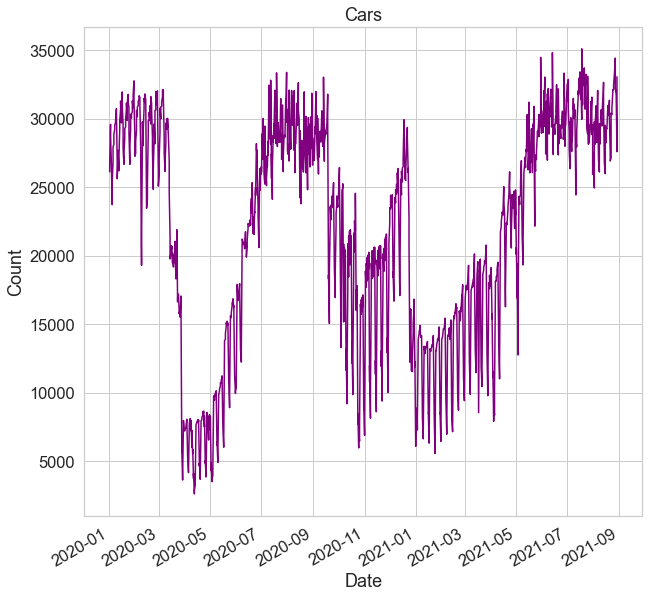

In [757]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(wtl['Date'],
        wtl['CAR'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Count",
       title="Cars")

ax.format_xdata = mdates.DateFormatter('%Y-%m')

fig.autofmt_xdate()

plt.show()


In [758]:
#That was not the best looking graph we can all admit

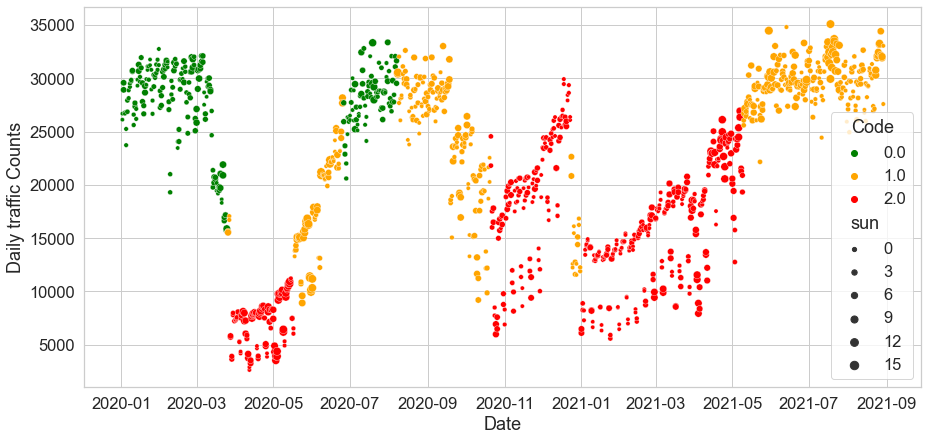

In [759]:
fig, ax = plt.subplots(figsize = (15, 7))



sns.scatterplot(x='Date',y='CAR', data=wtl, hue='Code', palette=['green','orange','red',], size ='sun')

plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')

plt.show()
            
               

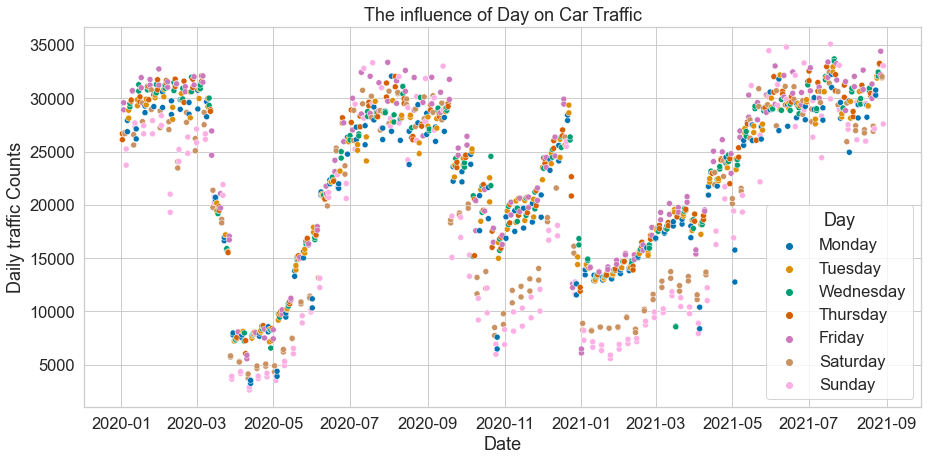

In [760]:
sig, ax = plt.subplots(figsize = (15, 7))

hue_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette("colorblind")

sns.scatterplot(x='Date',y='CAR', data=wtl, hue='Day', hue_order=hue_order,)
fg.legend(bbox_to_anchor= (1.2,1))
plt.title('The influence of Day on Car Traffic')

plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')

plt.show()

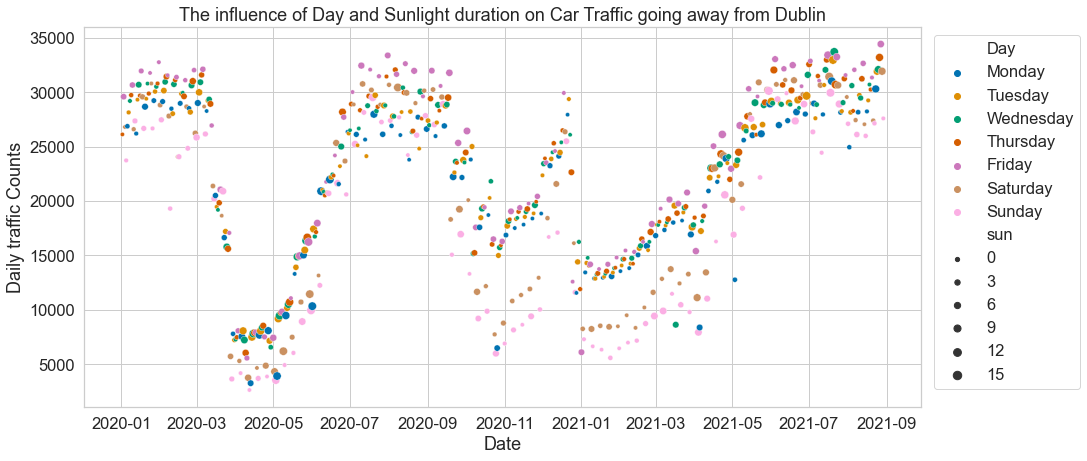

In [761]:
#Cars heading away from Dublin 

sig, ax = plt.subplots(figsize = (15, 7))

hue_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette("colorblind")

fg =sns.scatterplot(x='Date',y='CAR', data=swtl, hue='Day', hue_order=hue_order, size= 'sun')
fg.legend(bbox_to_anchor= (1.2,1))
plt.title('The influence of Day and Sunlight duration on Car Traffic going away from Dublin')
plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')

plt.show()

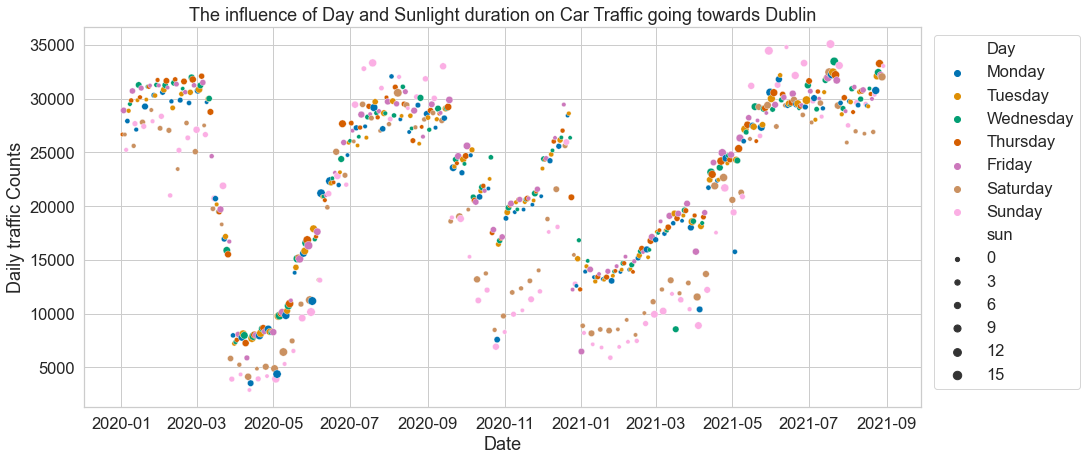

In [762]:
#Cars heading towards Dublin
sig, ax = plt.subplots(figsize = (15, 7))

hue_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette("colorblind")

fg =sns.scatterplot(x='Date',y='CAR', data=nwtl, hue='Day', hue_order=hue_order, size='sun')

fg.legend(bbox_to_anchor= (1.2,1))
plt.title('The influence of Day and Sunlight duration on Car Traffic going towards Dublin')
plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')

plt.show()

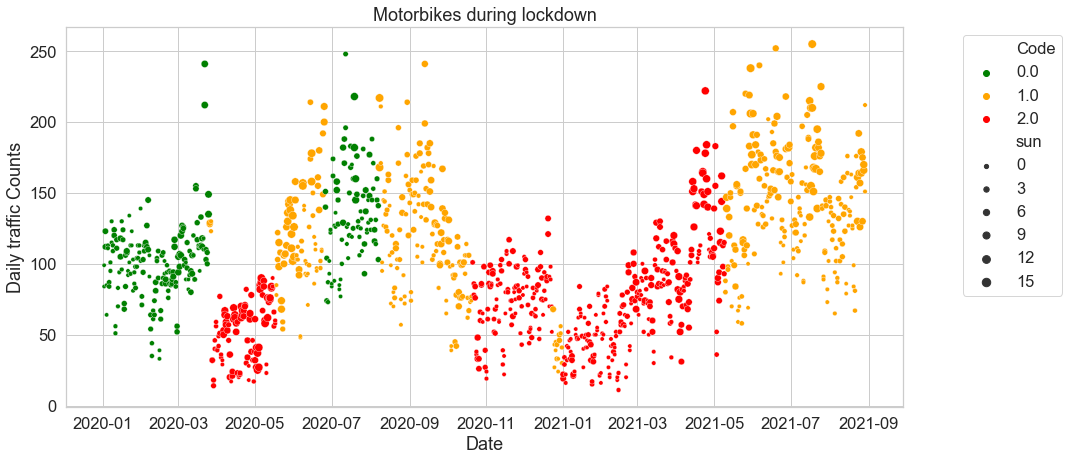

In [763]:
#Motorbike data

sig, ax = plt.subplots(figsize = (15, 7))



ffp = sns.scatterplot(x='Date',y='MBIKE', data=wtl, hue='Code', palette=['green','orange','red',], size ='sun')

plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')
plt.title('Motorbikes during lockdown')

plt.legend(title='Travel restrictions', loc='upper left')
ffp.legend(bbox_to_anchor= (1.2,1))
plt.show()
            

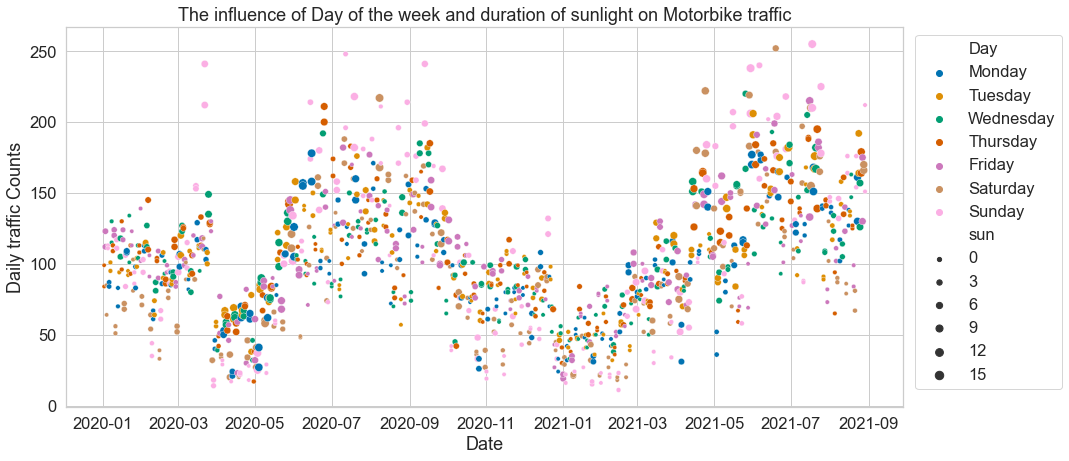

In [764]:
sig, ax = plt.subplots(figsize = (15, 7))

hue_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette("colorblind")

gfg = sns.scatterplot(x='Date',y='MBIKE', data=wtl, hue='Day', hue_order=hue_order, size ='sun')
plt.title('The influence of Day of the week and duration of sunlight on Motorbike traffic')
plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')

gfg.legend(bbox_to_anchor= (1.2,1))

plt.show()

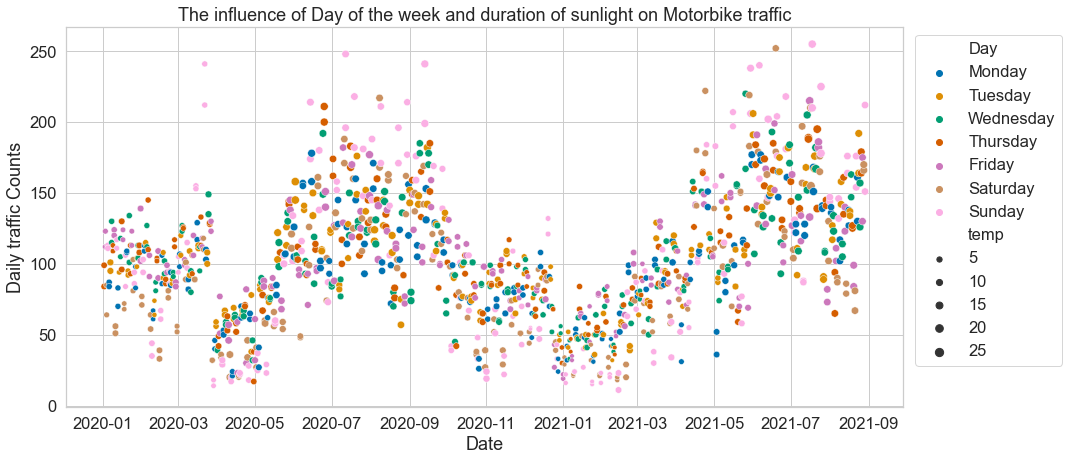

In [811]:
ig, ax = plt.subplots(figsize = (15, 7))

hue_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette("colorblind")

gfg = sns.scatterplot(x='Date',y='MBIKE', data=wtl, hue='Day', hue_order=hue_order, size ='temp')
plt.title('The influence of Day of the week and duration of sunlight on Motorbike traffic')
plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')

gfg.legend(bbox_to_anchor= (1.2,1))

plt.show()

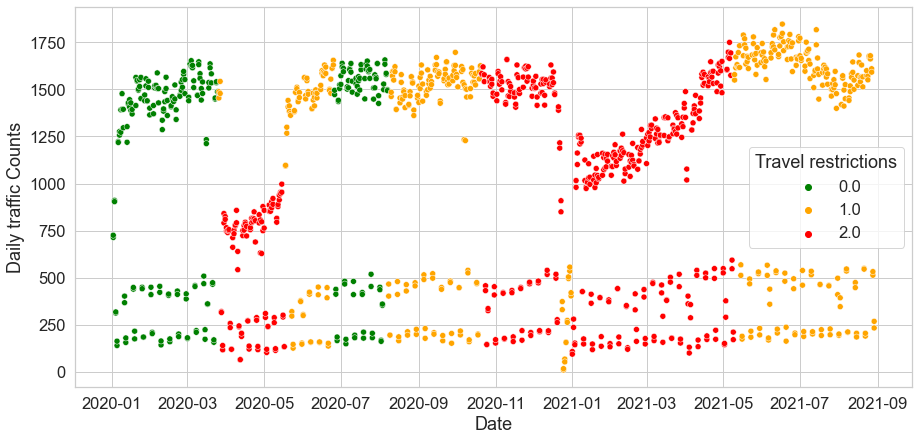

In [805]:
sig, ax = plt.subplots(figsize = (15, 7))



sns.scatterplot(x='Date',y='HGV', data=wtl, hue='Code', palette=['green','orange','red',])

plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')

plt.legend(title='Travel restrictions')
gfg.legend(bbox_to_anchor= (1.2,1))



plt.show()
            

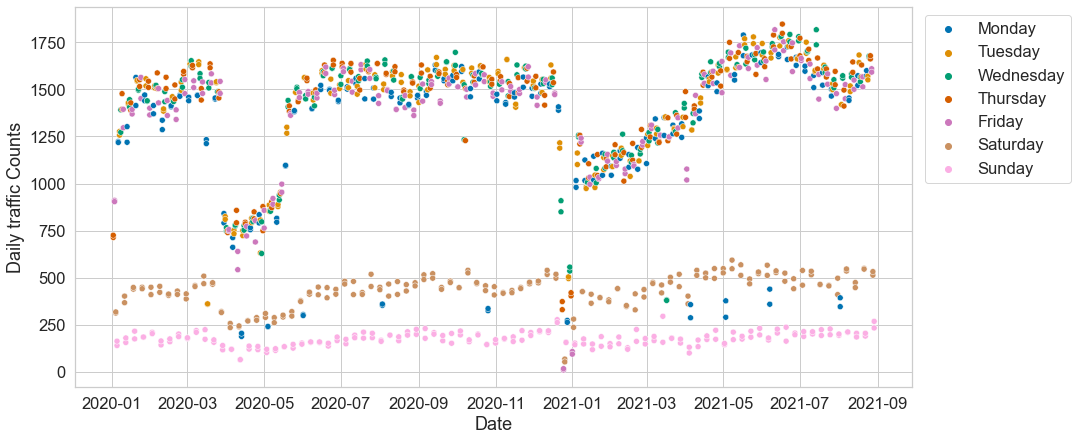

In [806]:
sig, ax = plt.subplots(figsize = (15, 7))

hue_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette("colorblind")

gfg=sns.scatterplot(x='Date',y='HGV', data=wtl, hue='Day', hue_order=hue_order)

gfg.legend(bbox_to_anchor= (1.2,1))

plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')

plt.show()

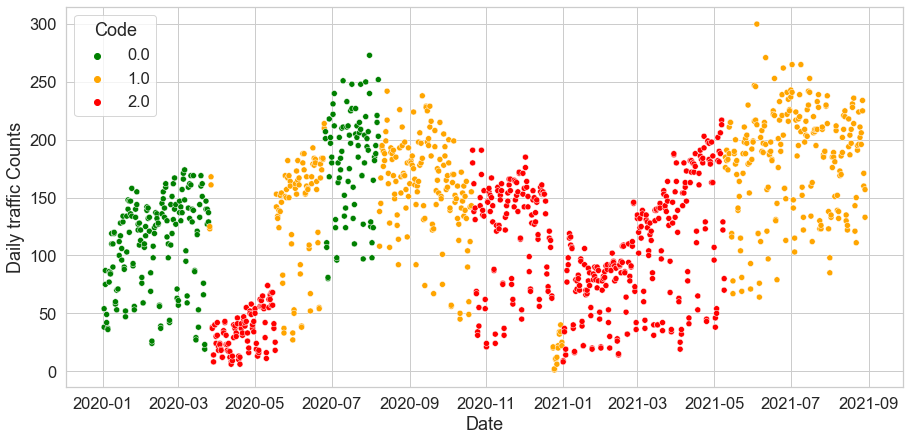

In [767]:
ig, ax = plt.subplots(figsize = (15, 7))



sns.scatterplot(x='Date',y='CARAVAN', data=wtl, hue='Code', palette=['green','orange','red',])

plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')

plt.show()
            

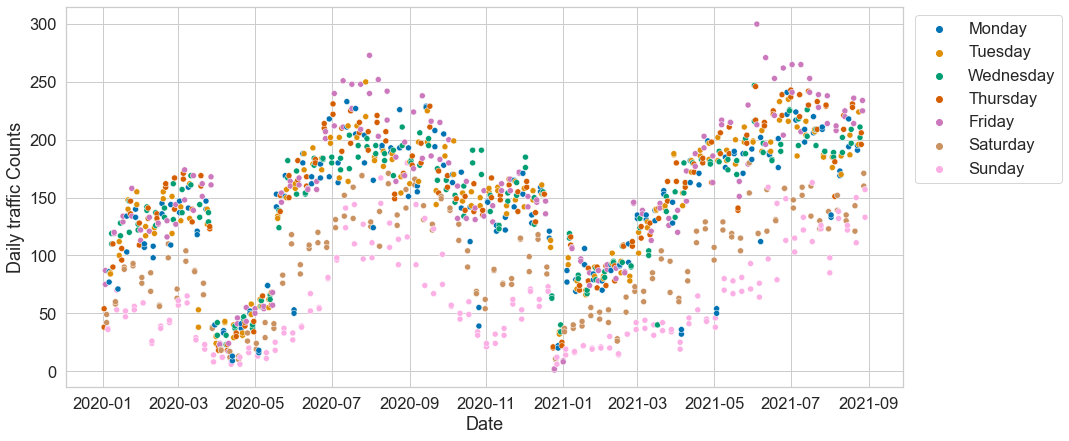

In [807]:
sig, ax = plt.subplots(figsize = (15, 7))

hue_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette("colorblind")

gfg = sns.scatterplot(x='Date',y='CARAVAN', data=wtl, hue='Day', hue_order=hue_order,)

plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')
gfg.legend(bbox_to_anchor= (1.2,1))


plt.show()

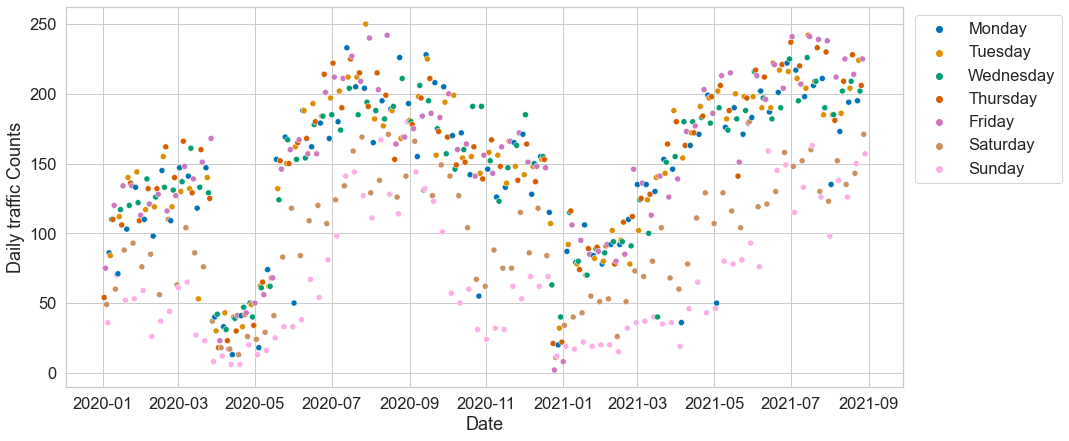

In [808]:
#caravans away from Dublin
sig, ax = plt.subplots(figsize = (15, 7))

hue_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette("colorblind")

gfg= sns.scatterplot(x='Date',y='CARAVAN', data=nwtl, hue='Day', hue_order=hue_order,)

plt.xlabel('Date')
plt.ylabel('Daily traffic Counts')
gfg.legend(bbox_to_anchor= (1.2,1))

plt.show()

In [770]:
#I just wanted to note the restiction deatils here
#2020
#March 12:  closure of schools, colleges and public places until March 29th at the earliest.
#March 15:  the pubs are ordered to close 
#March 27, Ireland was placed on full lockdown (2km limit)
#May 5: 5km limit
#May 18 : Intercounty travel
#August 7 - Restrictions announced for Kildare, Laois and Offaly
#October 19 : Level 5
#December 1: Reopening
#December 27 : Intercounty travel banned
#2021
#Jan 1: Level 5
#May 10: Intercounty travel
#June 2: Hotels open
#7 June : Pubs and restaurants open outdoor dining


In [771]:
#duration of first lockdown

from datetime import datetime
start = datetime(2020, 3, 27)
end = datetime(2020, 5, 18)

end - start



datetime.timedelta(days=52)

In [772]:
#duration of second lockdown

start = datetime(2021, 1, 1)
end = datetime(2021, 5, 1)

end - start


datetime.timedelta(days=120)

In [814]:
plot = wtl[['Date','Day','CAR', 'MBIKE','HGV', 'Code','temp','sun']]

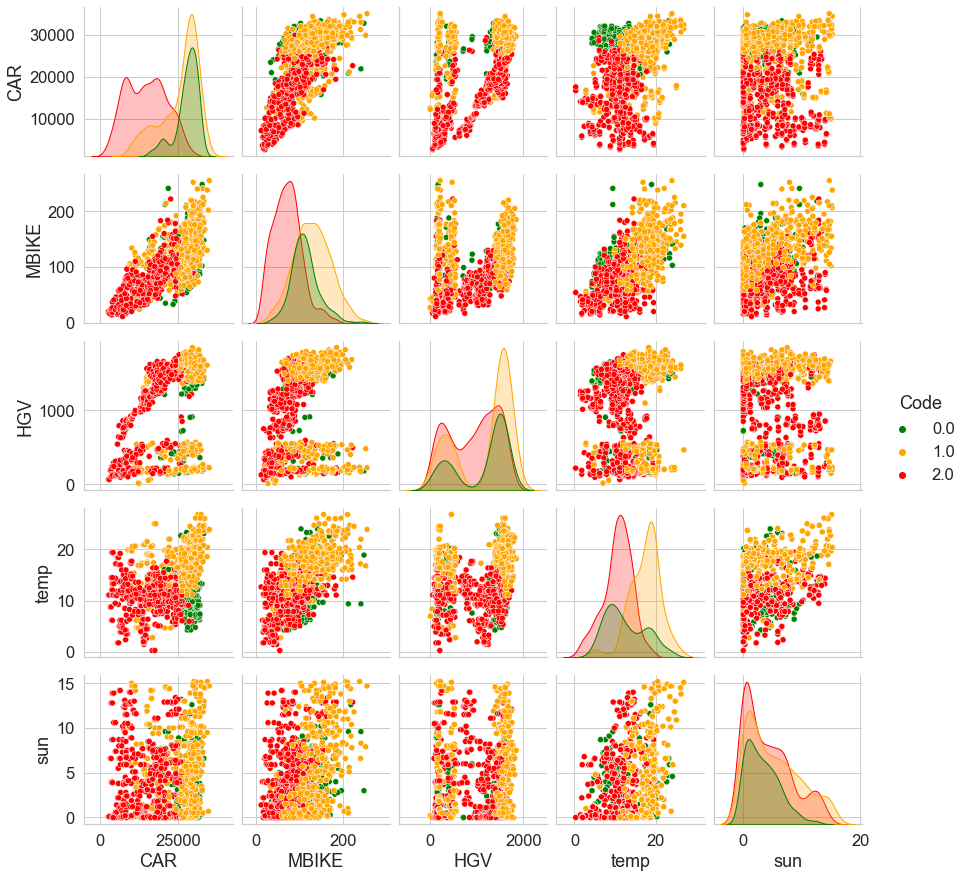

In [813]:
sns.pairplot(plot, hue='Code', palette=['green','orange','red',])



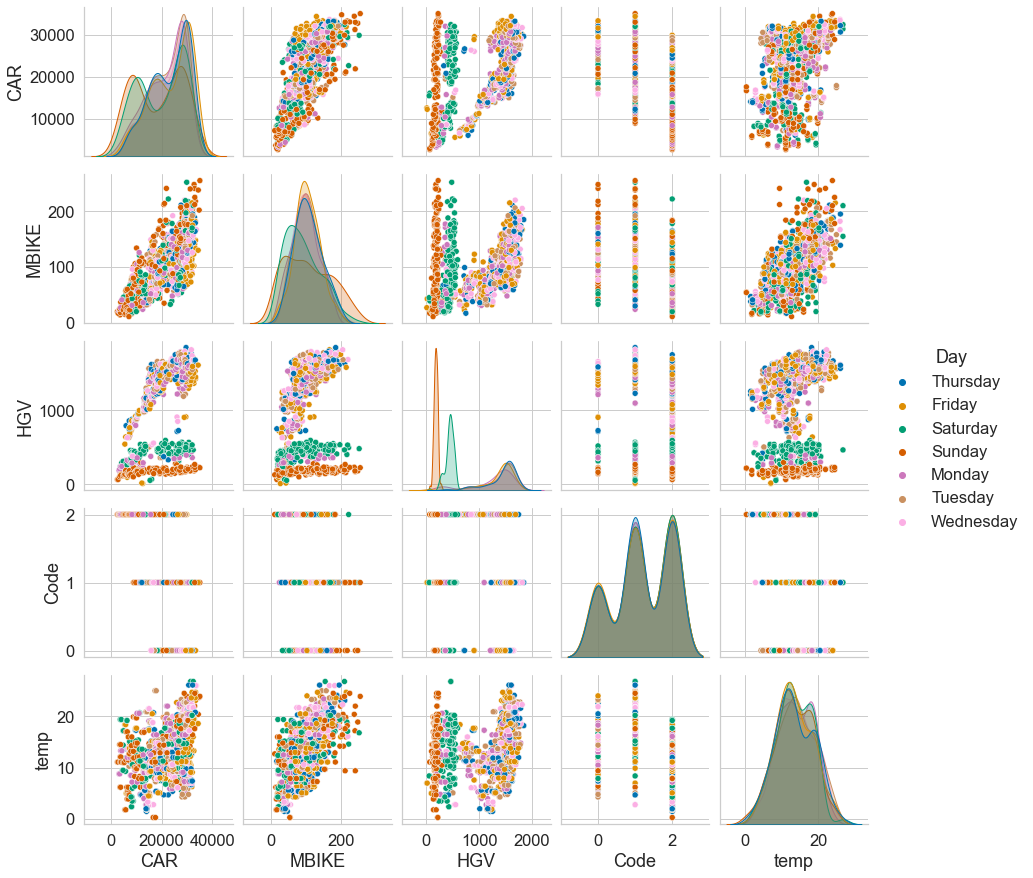

In [775]:
sns.pairplot(plot, hue='Day')

In [776]:
plot.corr()

,CAR,MBIKE,HGV,Code,temp
CAR,1.000000,0.700203,0.462140,-0.656792,0.392419
MBIKE,0.700203,1.000000,0.243664,-0.422449,0.615049
HGV,0.462140,0.243664,1.000000,-0.158836,0.171571
Code,-0.656792,-0.422449,-0.158836,1.000000,-0.258596
temp,0.392419,0.615049,0.171571,-0.258596,1.000000


In [777]:
#Based on this the highest correlation seems to be between motorbike numbers and temperature

In [778]:
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [779]:
X = plot[['temp']] # Pass in a list, expecting a 2D array
y = plot['MBIKE']

In [780]:
reg = LinearRegression().fit(X, y)


In [781]:
reg.score(X, y)

0.378285605889888

In [782]:
reg.predict([[23]])

array([154.38543423])

In [783]:
def biker(plot):
    return round(reg.predict([[plot]])[0],2)

In [784]:
reg.predict([[10]])

array([82.17932154])

In [785]:
rain = wtl[['Date','rain']]



print(rain)



           Date  rain
0    2020-01-02   1.2
1    2020-01-02   1.2
2    2020-01-03   0.0
3    2020-01-03   0.0
4    2020-01-04   0.1
...         ...   ...
1207 2021-08-27   0.0
1208 2021-08-28   0.0
1209 2021-08-28   0.0
1210 2021-08-29   0.0
1211 2021-08-29   0.0

[1212 rows x 2 columns]


In [786]:
import calendar

In [787]:
#Exctract month and create a dedicated column df["Month"] from a 
#column in datetime format df["Date"]



In [788]:
wtl['Month'] = wtl['Date'].dt.month_name(locale = 'English')
wtl['Year'] = df['Date'].dt.year
print(wtl)

           Date       Day Direction  MBIKE      CAR     LGV    BUS  CARAVAN  \
0    2020-01-02  Thursday         S   84.0  26116.0  2457.0  122.0     38.0   
1    2020-01-02  Thursday         N   99.0  26681.0  2788.0  125.0     54.0   
2    2020-01-03    Friday         S  123.0  29580.0  2809.0  161.0     87.0   
3    2020-01-03    Friday         N  112.0  28916.0  2919.0  150.0     75.0   
4    2020-01-04  Saturday         S   85.0  26797.0  1906.0   92.0     42.0   
...         ...       ...       ...    ...      ...     ...    ...      ...   
1207 2021-08-27    Friday         N  175.0  32198.0  4866.0  155.0    225.0   
1208 2021-08-28  Saturday         S  166.0  31921.0  2440.0  130.0    160.0   
1209 2021-08-28  Saturday         N  170.0  32039.0  2677.0  129.0    171.0   
1210 2021-08-29    Sunday         S  151.0  27586.0  1941.0  120.0    133.0   
1211 2021-08-29    Sunday         N  212.0  33050.0  2270.0   94.0    157.0   

         HGV  TOTAL_ALL  Code  temp  rain   sun  We

print(wtl)

In [816]:
wtl.dtypes



Date         datetime64[ns]
Day                  object
Direction            object
MBIKE               float64
CAR                 float64
LGV                 float64
BUS                 float64
CARAVAN             float64
HGV                 float64
TOTAL_ALL           float64
Code                float64
temp                float64
rain                float64
sun                 float64
Weekday              object
Rainy                object
Cloud                object
Weather              object
Month                object
Year                  int64
dtype: object

In [846]:
cardiff = wtl[['Date','CAR','HGV','MBIKE','temp','sun','rain']]




In [847]:
df = cardiff.resample('D', on='Date').mean()

In [848]:
print(df)

                CAR     HGV  MBIKE  temp   sun  rain
Date                                                
2020-01-02  26398.5   720.0   91.5  11.4   0.0   1.2
2020-01-03  29248.0   907.5  117.5   7.6   6.0   0.0
2020-01-04  26735.0   316.0   74.5   8.0   0.1   0.1
2020-01-05  24485.0   152.5  112.0  11.0   0.8   0.0
2020-01-06  27394.0  1220.5   85.5  10.3   2.4   2.4
...             ...     ...    ...   ...   ...   ...
2021-08-25  32275.5  1673.5  141.5  21.7  10.2   0.0
2021-08-26  33234.5  1669.5  171.5  20.8  12.4   0.0
2021-08-27  33307.5  1600.0  152.5  18.6   9.5   0.0
2021-08-28  31980.0   523.5  168.0  20.2  12.2   0.0
2021-08-29  30318.0   251.5  181.5  17.6   0.5   0.0

[606 rows x 6 columns]


In [849]:
df['Car_pct'] = df['CAR'].ffill().pct_change(freq='M')
df['HCV_pct'] = df['HGV'].ffill().pct_change(freq='M')
df['MBIKE_pct'] = df['MBIKE'].ffill().pct_change(freq='M')




In [850]:
print(df)

                CAR     HGV  MBIKE  temp   sun  rain  Car_pct  HCV_pct  \
Date                                                                     
2020-01-02  26398.5   720.0   91.5  11.4   0.0   1.2      NaN      NaN   
2020-01-03  29248.0   907.5  117.5   7.6   6.0   0.0      NaN      NaN   
2020-01-04  26735.0   316.0   74.5   8.0   0.1   0.1      NaN      NaN   
2020-01-05  24485.0   152.5  112.0  11.0   0.8   0.0      NaN      NaN   
2020-01-06  27394.0  1220.5   85.5  10.3   2.4   2.4      NaN      NaN   
...             ...     ...    ...   ...   ...   ...      ...      ...   
2021-08-25  32275.5  1673.5  141.5  21.7  10.2   0.0      NaN      NaN   
2021-08-26  33234.5  1669.5  171.5  20.8  12.4   0.0      NaN      NaN   
2021-08-27  33307.5  1600.0  152.5  18.6   9.5   0.0      NaN      NaN   
2021-08-28  31980.0   523.5  168.0  20.2  12.2   0.0      NaN      NaN   
2021-08-29  30318.0   251.5  181.5  17.6   0.5   0.0      NaN      NaN   

            MBIKE_pct  
Date         

In [851]:
df = df.reset_index()



In [852]:
df2 = df[['Date','Car_pct','HCV_pct','MBIKE_pct']]



In [853]:
dfs = df2[df2['Car_pct'].notna()]

In [854]:
df[ 'Average_temp' ] = df.temp.rolling( 7).mean()

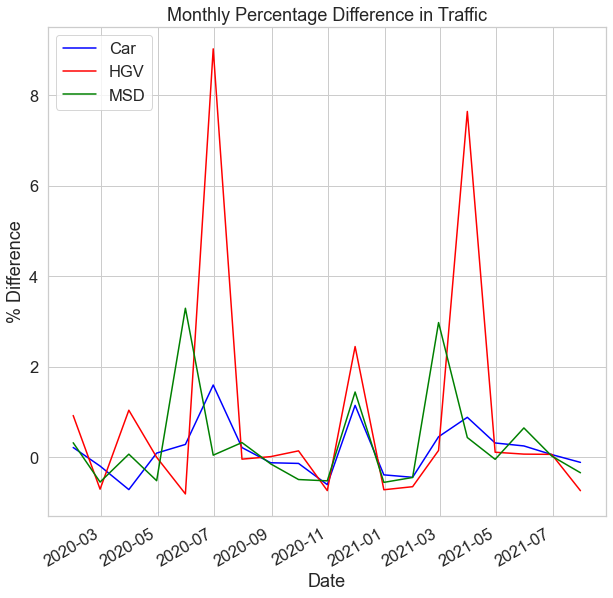

In [855]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.patches as mpatches
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))



# Add x-axis and y-axis
p1 = ax.plot(dfs['Date'],
        dfs['Car_pct'],
        color='blue',label='Car')

p2 = ax.plot(dfs['Date'],
        dfs['HCV_pct'],
        color='red',label='HGV')
           

p3 = ax.plot(dfs['Date'],
        dfs['MBIKE_pct'],
        color='Green',label='MSD')
           




# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="% Difference",
       title="Monthly Percentage Difference in Traffic")




ax.format_xdata = mdates.DateFormatter('%Y-%m')

fig.autofmt_xdate()
plt.legend(loc=2)
plt.show()


In [856]:
display(dfs)

,Date,Car_pct,HCV_pct,MBIKE_pct
29,2020-01-31,0.212076,0.919444,0.316940
58,2020-02-29,-0.198425,-0.709479,-0.551867
89,2020-03-31,-0.718731,1.036115,0.064815
119,2020-04-30,0.088508,-0.004281,-0.521739
150,2020-05-31,0.279720,-0.814496,3.290909
180,2020-06-30,1.593542,9.026490,0.042373
211,2020-07-31,0.210628,-0.045244,0.321138
242,2020-08-31,-0.125158,0.010377,-0.150769
272,2020-09-30,-0.139985,0.137624,-0.496377
303,2020-10-31,-0.609230,-0.740596,-0.525180


In [857]:
df[ 'Average_temp' ] = df.temp.rolling( 7).mean()

In [858]:
df[ 'Average_sun' ] = df.sun.rolling( 7).mean()

In [859]:
df[ 'Average_rain' ] = df.rain.rolling( 7).mean()

In [860]:
tempsun = df[['Date','Average_temp','Average_sun','Average_rain']]

In [861]:
tempsun = tempsun[tempsun['Average_temp'].notna()]

In [862]:
print(tempsun)

          Date  Average_temp  Average_sun  Average_rain
6   2020-01-08     10.385714     1.585714      0.942857
7   2020-01-09      9.585714     1.842857      2.100000
8   2020-01-10     10.000000     1.742857      2.114286
9   2020-01-11     10.728571     1.914286      3.142857
10  2020-01-12     10.200000     2.371429      3.285714
..         ...           ...          ...           ...
601 2021-08-25     19.971429     5.228571      2.128571
602 2021-08-26     20.200000     6.857143      2.071429
603 2021-08-27     19.928571     8.142857      1.514286
604 2021-08-28     20.157143     9.671429      0.071429
605 2021-08-29     19.928571     9.485714      0.042857

[600 rows x 4 columns]


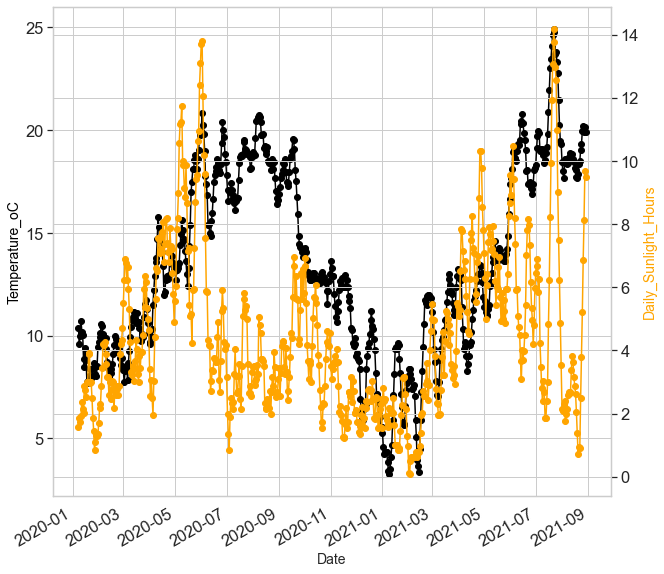

In [845]:
sns.set(font_scale=1.5, style="whitegrid")

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))




# make a plot
ax.plot(tempsun.Date, tempsun.Average_temp, color="black", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Temperature_oC",color="black",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(tempsun.Date, tempsun.Average_sun, color="orange", marker="o")
ax2.set_ylabel("Daily_Sunlight_Hours",color="orange",fontsize=14)


ax.format_xdata = mdates.DateFormatter('%Y-%m')

fig.autofmt_xdate()

plt.show()


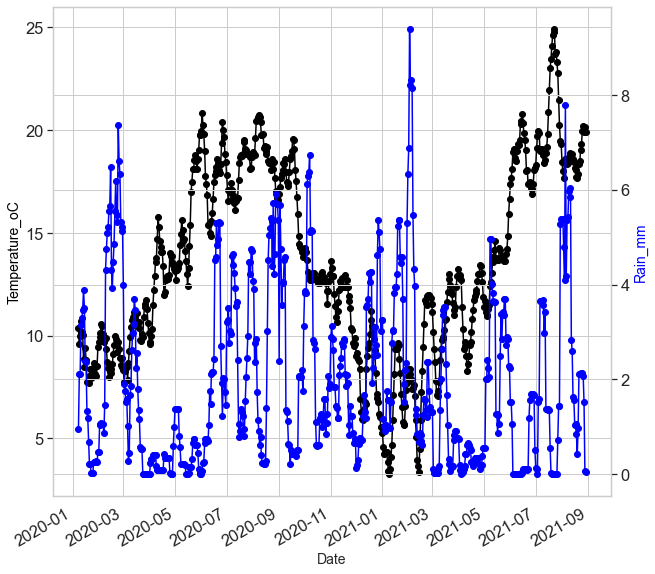

In [864]:
sns.set(font_scale=1.5, style="whitegrid")

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))


# make a plot
ax.plot(tempsun.Date, tempsun.Average_temp, color="black", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Temperature_oC",color="black",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(tempsun.Date, tempsun.Average_rain, color="blue", marker="o")
ax2.set_ylabel("Rain_mm",color="blue",fontsize=14)


ax.format_xdata = mdates.DateFormatter('%Y-%m')

fig.autofmt_xdate()

plt.show()
